In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #vizualization
import matplotlib.pyplot as plt #vizualization
from matplotlib import cm

import keras

from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.utils import shuffle

# Data Loading
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [5]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
data = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [7]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


EXPLORATORY DATA ANALYSIS****

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


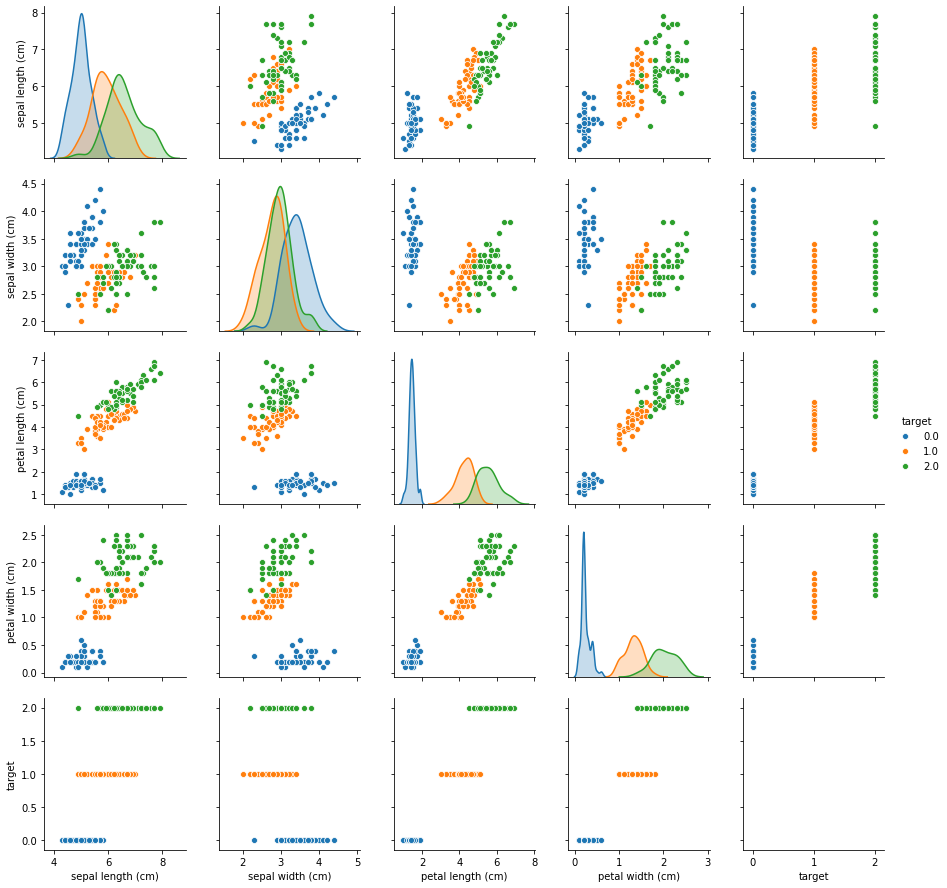

In [8]:
sns.pairplot(data=data[data.columns[0:6]], hue='target')
plt.show()

**** HEATMAP

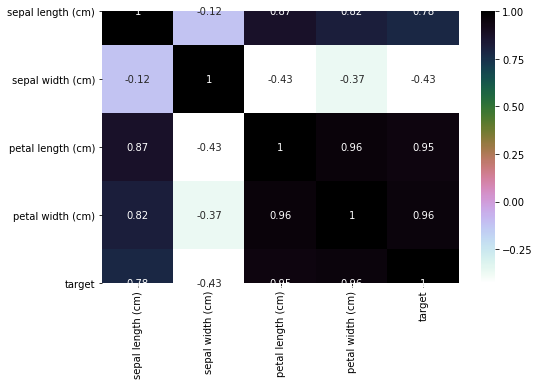

In [9]:
plt.figure(figsize=(8,5)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

In [10]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
#shuffling data
data = shuffle(data)

In [12]:
X=data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
target=data[['target']]
y_true=target.copy()

In [13]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
129,7.2,3.0,5.8,1.6
92,5.8,2.6,4.0,1.2
65,6.7,3.1,4.4,1.4
149,5.9,3.0,5.1,1.8
138,6.0,3.0,4.8,1.8
...,...,...,...,...
82,5.8,2.7,3.9,1.2
123,6.3,2.7,4.9,1.8
126,6.2,2.8,4.8,1.8
89,5.5,2.5,4.0,1.3


In [14]:
target

,target
129,2.0
92,1.0
65,1.0
149,2.0
138,2.0
...,...
82,1.0
123,2.0
126,2.0
89,1.0


In [15]:
#Train the model
X = StandardScaler().fit_transform(X)
target = LabelBinarizer().fit_transform(target)

In [16]:
target

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0,

In [17]:
#dividing into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 101)

In [18]:
#Model
model = Sequential()
model.add(Dense( 12, input_dim=4, activation = 'relu'))
model.add(Dense( units = 15, activation= 'relu'))
model.add(Dense( units = 8, activation= 'relu'))
model.add(Dense( units = 10, activation= 'relu'))
model.add(Dense( units = 3, activation= 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 120, validation_data = (x_test, y_test))

Epoch 1/120
4/4 [==============================] - 2s 280ms/step - loss: 1.1977 - accuracy: 0.3667 - val_loss: 1.2063 - val_accuracy: 0.3333
Epoch 2/120
4/4 [==============================] - 0s 25ms/step - loss: 1.1803 - accuracy: 0.3583 - val_loss: 1.1754 - val_accuracy: 0.3333
Epoch 3/120
4/4 [==============================] - 0s 26ms/step - loss: 1.1648 - accuracy: 0.3335 - val_loss: 1.1502 - val_accuracy: 0.3333
Epoch 4/120
4/4 [==============================] - 0s 22ms/step - loss: 1.1461 - accuracy: 0.3517 - val_loss: 1.1304 - val_accuracy: 0.3333
Epoch 5/120
4/4 [==============================] - 0s 22ms/step - loss: 1.1180 - accuracy: 0.4271 - val_loss: 1.1159 - val_accuracy: 0.5333
Epoch 6/120
4/4 [==============================] - 0s 21ms/step - loss: 1.1138 - accuracy: 0.4369 - val_loss: 1.1021 - val_accuracy: 0.5333
Epoch 7/120
4/4 [==============================] - 0s 22ms/step - loss: 1.1006 - accuracy: 0.4965 - val_loss: 1.0897 - val_accuracy: 0.5333
Epoch 8/120
4/4 [==

4/4 [==============================] - 0s 21ms/step - loss: 0.4843 - accuracy: 0.8192 - val_loss: 0.4801 - val_accuracy: 0.8000
Epoch 60/120
4/4 [==============================] - 0s 21ms/step - loss: 0.4473 - accuracy: 0.8752 - val_loss: 0.4672 - val_accuracy: 0.7667
Epoch 61/120
4/4 [==============================] - 0s 23ms/step - loss: 0.4574 - accuracy: 0.8527 - val_loss: 0.4563 - val_accuracy: 0.7667
Epoch 62/120
4/4 [==============================] - 0s 21ms/step - loss: 0.4788 - accuracy: 0.8033 - val_loss: 0.4468 - val_accuracy: 0.7667
Epoch 63/120
4/4 [==============================] - 0s 21ms/step - loss: 0.4241 - accuracy: 0.8323 - val_loss: 0.4387 - val_accuracy: 0.7667
Epoch 64/120
4/4 [==============================] - 0s 21ms/step - loss: 0.4450 - accuracy: 0.8221 - val_loss: 0.4304 - val_accuracy: 0.8000
Epoch 65/120
4/4 [==============================] - 0s 21ms/step - loss: 0.4291 - accuracy: 0.8148 - val_loss: 0.4218 - val_accuracy: 0.8000
Epoch 66/120
4/4 [========

4/4 [==============================] - 0s 24ms/step - loss: 0.1030 - accuracy: 0.9665 - val_loss: 0.0724 - val_accuracy: 1.0000
Epoch 118/120
4/4 [==============================] - 0s 22ms/step - loss: 0.1051 - accuracy: 0.9633 - val_loss: 0.0695 - val_accuracy: 1.0000
Epoch 119/120
4/4 [==============================] - 0s 27ms/step - loss: 0.1203 - accuracy: 0.9498 - val_loss: 0.0676 - val_accuracy: 1.0000
Epoch 120/120
4/4 [==============================] - 0s 22ms/step - loss: 0.1241 - accuracy: 0.9383 - val_loss: 0.0661 - val_accuracy: 1.0000


In [19]:
#Predicting Targets for test data from the model trained on train data
y_pred=model.predict_classes(x_test)

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
#Model performance
y_test

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [21]:
y_test=np.argmax(y_test, axis=1)

In [22]:
y_test

array([1, 2, 2, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1,
       0, 2, 0, 1, 1, 0, 0, 0], dtype=int64)

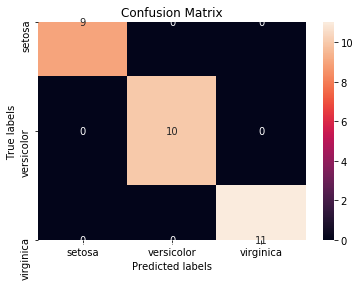

In [23]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test.tolist(), y_pred.tolist())

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']); ax.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica']);

In [24]:
from sklearn.metrics import precision_recall_fscore_support

In [25]:
precision_recall_fscore_support(y_test.tolist(), y_pred.tolist(), average='macro')

(1.0, 1.0, 1.0, None)

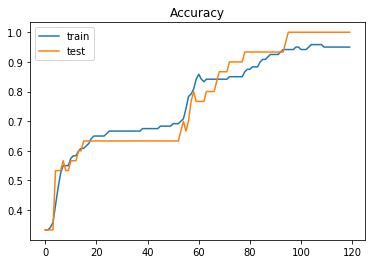

In [26]:
#Plotting Accuracy and Loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

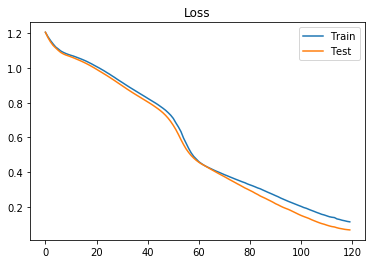

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()